# Assignment 11

## Use the Superstore_USA data and find the following scenarios:

#### Import packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Q1: Create a Bar chart showing the sales in terms of product Sub Category

#### Import data from excel sheet (Superstore_USA.xlsx)

In [4]:
data = pd.read_excel('Superstore_USA.xlsx')
data.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [5]:
columns = data.columns
columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [83]:
data.dtypes

Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost                  float64
Customer ID                      int64
Customer Name                   object
Ship Mode                       object
Customer Segment                object
Product Category                object
Product Sub-Category            object
Product Container               object
Product Name                    object
Product Base Margin            float64
Region                          object
State or Province               object
City                            object
Postal Code                      int64
Order Date              datetime64[ns]
Ship Date               datetime64[ns]
Profit                         float64
Quantity ordered new             int64
Sales                          float64
Order ID                         int64
dtype: object

In [6]:
data['Product Sub-Category'].head(10)

0                           Labels
1              Pens & Art Supplies
2                            Paper
3    Scissors, Rulers and Trimmers
4     Telephones and Communication
5                            Paper
6                  Office Machines
7               Chairs & Chairmats
8                            Paper
9                       Appliances
Name: Product Sub-Category, dtype: object

#### Grouping the data by 'Product Sub-Category' and summing up the sales for each group

In [14]:
sales_per_sub_category = data.groupby('Product Sub-Category').sum()['Sales']
sales_per_sub_category

Product Sub-Category
Appliances                         456723.08
Binders and Binder Accessories     638582.09
Bookcases                          507494.49
Chairs & Chairmats                1164584.16
Computer Peripherals               490840.53
Copiers and Fax                    661211.93
Envelopes                          147921.03
Labels                              23449.90
Office Furnishings                 444624.03
Office Machines                   1218656.59
Paper                              253600.31
Pens & Art Supplies                103251.59
Rubber Bands                         8663.77
Scissors, Rulers and Trimmers       40428.87
Storage & Organization             585704.91
Tables                            1061921.06
Telephones and Communication      1144272.98
Name: Sales, dtype: float64

#### Plot Product Sub-Category v/s Sales

In [16]:
x = sales_per_sub_category.index
x

Index(['Appliances', 'Binders and Binder Accessories', 'Bookcases',
       'Chairs & Chairmats', 'Computer Peripherals', 'Copiers and Fax',
       'Envelopes', 'Labels', 'Office Furnishings', 'Office Machines', 'Paper',
       'Pens & Art Supplies', 'Rubber Bands', 'Scissors, Rulers and Trimmers',
       'Storage & Organization', 'Tables', 'Telephones and Communication'],
      dtype='object', name='Product Sub-Category')

In [17]:
heights = sales_per_sub_category.values
heights

array([ 456723.08,  638582.09,  507494.49, 1164584.16,  490840.53,
        661211.93,  147921.03,   23449.9 ,  444624.03, 1218656.59,
        253600.31,  103251.59,    8663.77,   40428.87,  585704.91,
       1061921.06, 1144272.98])

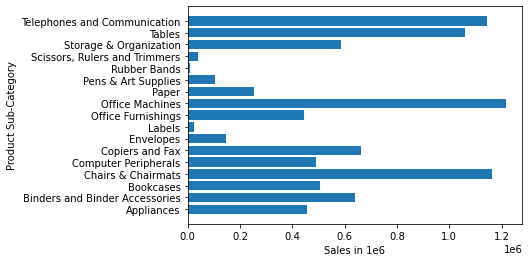

In [42]:
plt.barh(x, heights, label='Product Sub-Category')
plt.ylabel('Product Sub-Category')
plt.xlabel('Sales in 1e6')
plt.show()

### Q2: Create a SET of the top 10 Customer and Use it to show the Customer which comes within the SET

#### Group by Customer ID, Sum on Sales per customer, sort by sales in decreasing order and select the top 10

In [80]:
customer_sales = pd.DataFrame(data.groupby('Customer ID').sum()['Sales'])
customer_sales

,Sales
Customer ID,
2,5.90
3,5014.28
5,6476.10
6,3332.31
7,232.95
...,...
3398,9154.64
3399,2308.87
3400,1924.32


In [81]:
customer_sales['Customer ID'] = customer_sales.index
customer_sales.reset_index(drop=True, inplace=True)
customer_sales

,Sales,Customer ID
0,5.90,2
1,5014.28,3
2,6476.10,5
3,3332.31,6
4,232.95,7
...,...,...
2698,9154.64,3398
2699,2308.87,3399
2700,1924.32,3400
2701,4646.34,3402


In [82]:
top_10_customers = customer_sales.sort_values('Sales', ascending=False).iloc[:10,:]
top_10_customers = top_10_customers[['Customer ID', 'Sales']]
top_10_customers.reset_index(drop=True, inplace=True)
top_10_customers

,Customer ID,Sales
0,3075,123745.62
1,308,89269.70
2,2571,86540.75
3,2107,83651.70
4,553,81296.39
5,1733,78243.60
6,640,69118.00
7,1999,61610.60
8,2867,61298.98
9,349,58947.41


### Q3: Create a Bar chart showing the profit in terms of Product Sub Category

#### Group by Product Sub-Category, sum up Profit by each groupm

In [85]:
profit_per_category = data.groupby('Product Sub-Category').sum('Profit')['Profit']
profit_per_category

Product Sub-Category
Appliances                        121651.391380
Binders and Binder Accessories    226572.523042
Bookcases                          -7708.748564
Chairs & Chairmats                165348.882760
Computer Peripherals               87917.842513
Copiers and Fax                   129156.684030
Envelopes                          46133.223840
Labels                             17775.320505
Office Furnishings                 92209.225867
Office Machines                   168072.833340
Paper                              35361.621738
Pens & Art Supplies                 1195.902840
Rubber Bands                       -2841.722459
Scissors, Rulers and Trimmers      -1936.849120
Storage & Organization              8078.804727
Tables                            -72495.061875
Telephones and Communication      297950.524866
Name: Profit, dtype: float64

#### Plot Bar Chart: Product Sub-Category v/s Profit

In [86]:
y_prod_sub_cat = profit_per_category.index
y_prod_sub_cat

Index(['Appliances', 'Binders and Binder Accessories', 'Bookcases',
       'Chairs & Chairmats', 'Computer Peripherals', 'Copiers and Fax',
       'Envelopes', 'Labels', 'Office Furnishings', 'Office Machines', 'Paper',
       'Pens & Art Supplies', 'Rubber Bands', 'Scissors, Rulers and Trimmers',
       'Storage & Organization', 'Tables', 'Telephones and Communication'],
      dtype='object', name='Product Sub-Category')

In [87]:
x_profit = profit_per_category.values
x_profit

array([121651.39138   , 226572.523042  ,  -7708.748564  , 165348.88276   ,
        87917.8425126 , 129156.68403   ,  46133.22384   ,  17775.320505  ,
        92209.2258668 , 168072.8333396 ,  35361.6217376 ,   1195.9028398 ,
        -2841.7224594 ,  -1936.84912   ,   8078.8047268 , -72495.06187475,
       297950.5248656 ])

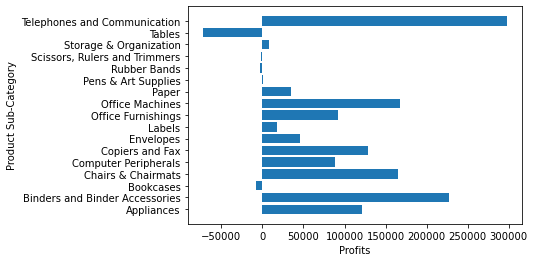

In [88]:
plt.barh(y_prod_sub_cat, x_profit)
plt.xlabel('Profits')
plt.ylabel('Product Sub-Category')
plt.show()

#### Color coding the profits and loss in the bar chart

In [95]:
color = profit_per_category.copy()

def color_code(x):
    if x < 0: return 'r'
    return 'g'

color = color.map(lambda x: color_code(x))
color

Product Sub-Category
Appliances                        g
Binders and Binder Accessories    g
Bookcases                         r
Chairs & Chairmats                g
Computer Peripherals              g
Copiers and Fax                   g
Envelopes                         g
Labels                            g
Office Furnishings                g
Office Machines                   g
Paper                             g
Pens & Art Supplies               g
Rubber Bands                      r
Scissors, Rulers and Trimmers     r
Storage & Organization            g
Tables                            r
Telephones and Communication      g
Name: Profit, dtype: object

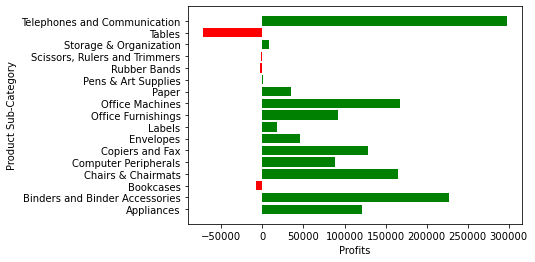

In [96]:
plt.barh(y_prod_sub_cat, x_profit, color = color.values)
plt.xlabel('Profits')
plt.ylabel('Product Sub-Category')
plt.show()

### Q4: Create a SET of the top 10 Customer and Use it to show the Customer which comes within the SET

#### Group by Customer ID, sum on Profit by Customer ID, sort profits in decreasing order and get the top 10 values

In [124]:
profit_by_customer = pd.DataFrame(data.groupby('Customer ID').sum('Profit')['Profit']
profit_by_customer

,Profit
Customer ID,
2,1.320000
3,3314.109900
5,4249.106500
6,2265.693000
7,72.992800
...,...
3398,2775.197000
3399,1256.214680
3400,807.363000


In [126]:
profit_by_customer['Customer ID'] = profit_by_customer.index.values
profit_by_customer.reset_index(drop=True, inplace=True)
profit_by_customer = profit_by_customer[['Customer ID', 'Profit']]
profit_by_customer

,Customer ID,Profit
0,2,1.320000
1,3,3314.109900
2,5,4249.106500
3,6,2265.693000
4,7,72.992800
...,...,...
2698,3398,2775.197000
2699,3399,1256.214680
2700,3400,807.363000
2701,3402,-1640.029517


In [127]:
top_10_customer_by_profit = profit_by_customer.sort_values('Profit', ascending=False).iloc[:10,:]
top_10_customer_by_profit.reset_index(drop=True, inplace=True)
top_10_customer_by_profit

,Customer ID,Profit
0,3397,17536.851156
1,3302,17306.633400
2,1733,16432.454100
3,1569,12511.653300
4,1118,11820.745900
5,771,11080.494700
6,1836,10427.945220
7,84,9818.766900
8,693,9700.951052
9,2107,9289.944500


### Q5: Combine both the SET and use to show the customers who brings both Profit & Revenue

#### Inner join the 2 sets on Customer ID

In [132]:
# Customer ID as index
top_10_customer_copy = top_10_customers.copy()
top_10_customer_copy.index = top_10_customer_copy['Customer ID']
top_10_customer_copy.drop(columns='Customer ID', inplace=True)
top_10_customer_copy

,Sales
Customer ID,
3075,123745.62
308,89269.70
2571,86540.75
2107,83651.70
553,81296.39
1733,78243.60
640,69118.00
1999,61610.60
2867,61298.98


In [133]:
# Customer ID as index
top_10_customer_by_profit_copy = top_10_customer_by_profit.copy()
top_10_customer_by_profit_copy.index = top_10_customer_by_profit_copy['Customer ID']
top_10_customer_by_profit_copy.drop(columns='Customer ID', inplace=True)
top_10_customer_by_profit_copy

,Profit
Customer ID,
3397,17536.851156
3302,17306.633400
1733,16432.454100
1569,12511.653300
1118,11820.745900
771,11080.494700
1836,10427.945220
84,9818.766900
693,9700.951052


In [166]:
result = []

for index, row in top_10_customer_copy.iterrows():
    if index in top_10_customer_by_profit_copy.index.values:
        new_row = {'Customer ID': index, 'Sales': row['Sales'], 'Profit': top_10_customer_by_profit_copy.loc[index, 'Profit']}
        result.append(new_row)

final = pd.DataFrame(result)
final

,Customer ID,Sales,Profit
0,2107,83651.7,9289.9445
1,1733,78243.6,16432.4541
